#Binary Classification : Classification Of Image
To `Label` different images from the `Fashion_MNIST` dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tf.__version__,keras.__version__

('2.7.0', '2.7.0')

##1. Downloading and Loading the dataset 
Download and load the `fashion_mnist` dataset from `keras.dataset`

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_names_dict = { 0:'T-shirt/top',
                    1:'Trouser',
                    2:'Pullover',
                    3:'Dress',
                    4:'Coat',
                    5:'Sandal',
                    6:'Shirt',
                    7:'Sneaker',
                    8:'Bag',
                    9:'Ankle boot'}
class_names = np.array(list(class_names_dict.values()),dtype=str)
class_names

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

##2. Display Image Samples
Plot a figure to display images from the data with it's label

In [ ]:
def view_image_samples(data,labels=None,class_names=None,n_samples=10,imsize=(3,3)):
  n = int(np.sqrt(n_samples).round())
  if np.square(n)>=n_samples:
    nrows = n
    ncols = n
  else:
    nrows = n
    ncols = n+1
  indexes = np.random.choice(range(len(data)),size=n_samples)
  images = data[indexes]
  labels = class_names[labels[indexes]]
  fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(nrows*imsize[0],ncols*imsize[1]))
  plt.tight_layout()
  # plt.subplots_adjust(wspace=0.1,hspace=0)
  axes = axes.flatten()
  for ax,img,label in zip(axes,images,labels):
    ax.imshow(img)
    ax.set_title(label,fontsize=18)
    # ax.set_xlabel(label,fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
  if nrows*ncols - n_samples>0:
    for ax in axes[-(nrows*ncols-n_samples):]:
      plt.delaxes(ax)
  plt.show();

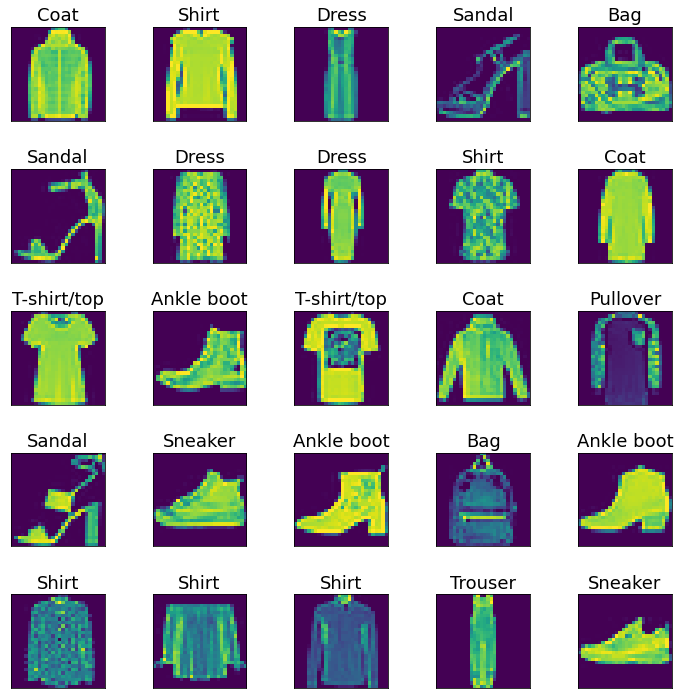

In [ ]:
view_image_samples(train_images,train_labels,class_names,25,(2,2));

##3. Building and Training Model

In [ ]:
from keras import Sequential,Model
from keras.layers import Input,Flatten,Dense,Conv2D,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping,TensorBoard,LearningRateScheduler

##Model_1 : Dense 

In [ ]:
model_1 = Sequential([
                      Flatten(input_shape=train_images[0].shape),
                      Dense(128,activation='relu'),
                      Dense(len(class_names))
])

In [ ]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8108 - accuracy: 0.6701
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7475 - accuracy: 0.7112
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6444 - accuracy: 0.7451
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5997 - accuracy: 0.7690
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5719 - accuracy: 0.7820
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5628 - accuracy: 0.7894
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5386 - accuracy: 0.8050
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5150 - accuracy: 0.8227
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8302
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.490

In [ ]:
m1_loss, m1_acc = model_1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.8273


In [ ]:
pred_labels = model_1.predict(test_images)
pred_labels.shape

(10000, 10)

In [ ]:
def plot_image_and_pred(img, pred_prob, true_label):
  true_class = class_names[true_label]
  max_prob = np.max(pred_prob)
  pred_label = np.argmax(pred_prob)
  pred_class = class_names[pred_label]
  plt.subplot2grid((2,2),(0,0),rowspan=2,colspan=1)
  plt.imshow(img)
  plt.title(f'True Class : {true_class}')
  plt.xlabel(f'Predicted Class :{pred_class} {max_prob:.2f}%')

  plt.subplot2grid((2,2),(0,1),rowspan=2,colspan=2)
  thisplot = plt.bar(range(len(class_names)),pred_prob,color='#777')
  plt.ylim([0,100])
  plt.xticks(range(len(class_names)),labels=class_names,rotation=90)
  color = 'green' if pred_class==true_class else 'red'
  thisplot[pred_label].set_color('lightblue')
  thisplot[true_label].set_color(color)
  plt.tight_layout()

[-28.243753 -15.739736 -36.283302 -61.090656  -8.929647  60.79043
 -48.861217  54.138424  37.883366  52.998802]


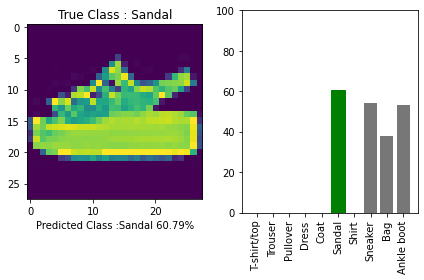

In [ ]:
idx = np.random.choice(range(len(test_images)))
print(pred_labels[idx])
plot_image_and_pred(test_images[idx],pred_labels[idx],test_labels[idx])

In [ ]:
def view_model_image_preds(model,data,true_labels,class_names=None,n_samples=10,imsize=(3,3)):
  n = int(np.sqrt(n_samples).round())
  if np.square(n)>=n_samples:
    nrows = n
    ncols = n
  else:
    nrows = n+1
    ncols = n
  indexes = np.random.choice(range(len(data)),size=n_samples)
  images = data[indexes]
  true_classes = class_names[true_labels]

  pred_probs = model.predict(data)
  fig,axes = plt.subplots(nrows=nrows,ncols=2*ncols,figsize=(nrows*imsize[0],2*ncols*imsize[1]))
  plt.tight_layout()
  axes = axes.flatten().reshape(nrows*ncols,2)
  for ax12,img,true_label,pred_percent in zip(axes,images,true_labels,pred_probs):
    true_class = class_names[true_label]
    pred_prob = pred_percent/100
    max_prob = np.max(pred_prob)
    pred_label = np.argmax(pred_prob)
    pred_class = class_names[pred_label]

    ax1,ax2 = ax12
    
    ax1.imshow(img)
    ax1.set_title(f'True Class : {true_class}')
    ax1.set_xlabel(f'Predicted Class :{pred_class} {max_prob:.2f}%')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    
    thisbar =ax2.bar(range(len(class_names)),pred_prob,color='#777')
    ax2.set_ylim([0,1])
    ax2.set_xticks(range(len(class_names)))
    ax2.set_xticklabels(class_names,rotation=90)
    color = 'green' if pred_class==true_class else 'red'
    thisbar[pred_label].set_color('lightblue')
    thisbar[true_label].set_color(color)
    
  if nrows*ncols - n_samples>0:
    for rem_ax12 in axes[-(nrows*ncols-n_samples):]:
      for ax in rem_ax12:
        plt.delaxes(ax)
  plt.tight_layout()
  plt.show();

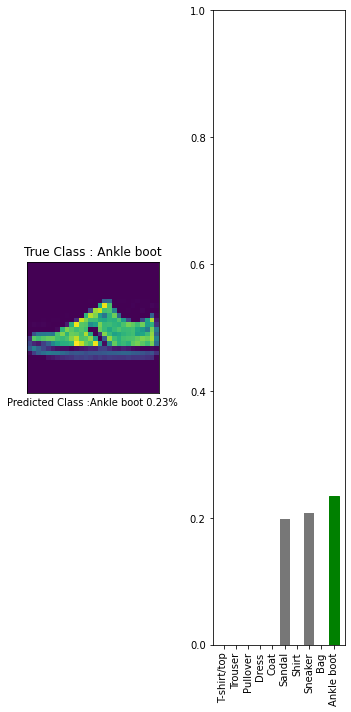

In [ ]:
view_model_image_preds(model_1,test_images,test_labels,class_names,1,imsize=(5,5))

In [ ]:
model_2 = Sequential([
                      Input(s)
])

1